In [1]:
import numpy as np
from matplotlib import pyplot as plt
from hdf5storage import loadmat,savemat
import pandas as pd

In [2]:
# /home/zhibinz2/Documents/GitHub/Motor_coordination_code/Fig7_networkx.ipynb
# load('nx144.mat'); % 144x2x7x32
outdict=loadmat('/home/zhibinz2/Documents/GitHub/Motor_coordination_code/nx144.mat')

In [3]:
dg_ctr144       =outdict['dg_ctr144']          # 144x2x7x32
efficiency144   =outdict['efficiency144']  # 144x2x7x32
bw_ctr144       =outdict['bw_ctr144']

In [4]:
indices=loadmat('/home/zhibinz2/Documents/GitHub/Motor_coordination_code/Indicies.mat')
syn2_condi4_ind     = indices['syn2_condi4_ind']
indices.keys()

dict_keys(['L_lead_ind', 'L_lead_synch_ind', 'L_lead_synco_ind', 'Mutual_ind', 'Mutual_synch_ind', 'Mutual_synco_ind', 'R_lead_ind', 'R_lead_synch_ind', 'R_lead_synco_ind', 'Uncoupled_ind', 'Uncoupled_synch_ind', 'Uncoupled_synco_ind', 'condi4_ind', 'syn2_condi4_ind', 'syn_ind', 'synch_condi4_ind', 'synch_ind', 'synco_condi4_ind', 'synco_ind'])

In [6]:
#organize hurst exponents 
dgctr_ind_synch     = np.zeros(36)
dgctr_lead_synch    = np.zeros(36)
dgctr_follow_synch  = np.zeros(36)
dgctr_mutual_synch  = np.zeros(36)
dgctr_ind_synco     = np.zeros(36)
dgctr_lead_synco    = np.zeros(36)
dgctr_follow_synco  = np.zeros(36)
dgctr_mutual_synco  = np.zeros(36)
dgctr_ind_synch[0:18]       = dg_ctr144[indices['Uncoupled_synch_ind'],0]
dgctr_ind_synch[18:36]      = dg_ctr144[indices['Uncoupled_synch_ind'],1]
dgctr_lead_synch[0:18]      = dg_ctr144[indices['L_lead_synch_ind'],0]
dgctr_lead_synch[18:36]     = dg_ctr144[indices['R_lead_synch_ind'],1]
dgctr_follow_synch[0:18]    = dg_ctr144[indices['R_lead_synch_ind'],0]
dgctr_follow_synch[18:36]   = dg_ctr144[indices['L_lead_synch_ind'],1]
dgctr_mutual_synch[0:18]    = dg_ctr144[indices['Mutual_synch_ind'],0]
dgctr_mutual_synch[18:36]   = dg_ctr144[indices['Mutual_synch_ind'],1]
dgctr_ind_synco[0:18]       = dg_ctr144[indices['Uncoupled_synco_ind'],0]
dgctr_ind_synco[18:36]      = dg_ctr144[indices['Uncoupled_synco_ind'],1]
dgctr_lead_synco[0:18]      = dg_ctr144[indices['L_lead_synco_ind'],0]
dgctr_lead_synco[18:36]     = dg_ctr144[indices['R_lead_synco_ind'],1]
dgctr_follow_synco[0:18]    = dg_ctr144[indices['R_lead_synco_ind'],0]
dgctr_follow_synco[18:36]   = dg_ctr144[indices['L_lead_synco_ind'],1]
dgctr_mutual_synco[0:18]    = dg_ctr144[indices['Mutual_synco_ind'],0] 
dgctr_mutual_synco[18:36]   = dg_ctr144[indices['Mutual_synco_ind'],1]


# organized into np
H_synch=[H_ind_synch, H_lead_synch, H_follow_synch, H_mutual_synch]
H_synco=[H_ind_synco, H_lead_synco, H_follow_synco, H_mutual_synco]
H_syn=[H_synch, H_synco]

[array([  3,   7,  11,  26,  28,  32,  50,  53,  56,  75,  78,  80,  96,
        102, 106, 121, 125, 130]),
 1]

In [10]:
indices

{'L_lead_ind': (array([  0,   5,  10,  12,  17,  22,  27,  31,  34,  39,  43,  46,  51,
          52,  58,  63,  64,  70,  72,  77,  81,  84,  89,  93,  97, 100,
         105, 109, 112, 117, 123, 126, 128, 135, 138, 140]),),
 'L_lead_synch_ind': array([  0,   5,  10,  27,  31,  34,  51,  52,  58,  72,  77,  81,  97,
        100, 105, 123, 126, 128]),
 'L_lead_synco_ind': array([ 12,  17,  22,  39,  43,  46,  63,  64,  70,  84,  89,  93, 109,
        112, 117, 135, 138, 140]),
 'Mutual_ind': (array([  2,   6,   9,  14,  18,  21,  25,  30,  35,  37,  42,  47,  48,
          55,  57,  60,  67,  69,  74,  79,  83,  86,  91,  95,  98, 103,
         104, 110, 115, 116, 122, 127, 131, 134, 139, 143]),),
 'Mutual_synch_ind': array([  2,   6,   9,  25,  30,  35,  48,  55,  57,  74,  79,  83,  98,
        103, 104, 122, 127, 131]),
 'Mutual_synco_ind': array([ 14,  18,  21,  37,  42,  47,  60,  67,  69,  86,  91,  95, 110,
        115, 116, 134, 139, 143]),
 'R_lead_ind': (array([  1,   4,   8, 

In [5]:
outdict=loadmat('/home/zhibinz2/Documents/GitHub/Motor_coordination_code/cc3_syn.mat')
cc3_syn=outdict['cc3_syn'] # 3nx x 2 syn x 4 condi x36 tr x 7 freq x32 chan

permutate 36condi+36independent

In [11]:
# permutation test reference: /home/zhibinz2/Documents/GitHub/STROKE_P61/lesion_mask_on_L_p61_20240427/networkx/new_simu/permutation20241126.ipynb
nx3gain10   =np.zeros((3,2,3,7,32)) # 3nx x 2syn x 3contrast condi x7freq x32chan
nx3gain01   =np.zeros((3,2,3,7,32))
nx3counter10=np.zeros((3,2,3,7,32))
nx3counter01=np.zeros((3,2,3,7,32))

In [ ]:
rng = np.random.default_rng(seed =300)
for nx in range(3):
    for syn in range(2):
        for contrast_condi in range(1,4):
            for freq in range(7):
                print(freq)
                for chan in range(32):
                    nx3gain10[nx,syn,contrast_condi-1,freq,chan]=\
                        np.mean(cc3_syn[nx,syn,contrast_condi,:,freq,chan])/np.mean(cc3_syn[nx,syn,0,:,freq,chan])
                    nx3gain01[nx,syn,contrast_condi-1,freq,chan]=\
                        np.mean(cc3_syn[nx,syn,0,:,freq,chan])/np.mean(cc3_syn[nx,syn,contrast_condi,:,freq,chan]) # some trials get nan and inf
                    sim10=np.zeros((100000,1))
                    sim01=np.zeros((100000,1))
                    for j in range(100000):
                        combined_array = np.concatenate((cc3_syn[nx,syn,0,:,freq,chan], cc3_syn[nx,syn,contrast_condi,:,freq,chan]))
                        permu_combined=rng.permutation(combined_array)
                        sim10[j,:]=np.mean(permu_combined[36:72])/np.mean(permu_combined[0:36])
                        sim01[j,:]=np.mean(permu_combined[0:36])/np.mean(permu_combined[36:72])
                        nx3counter10[nx,syn,contrast_condi-1,freq,chan]=nx3counter10[nx,syn,contrast_condi-1,freq,chan]+\
                            (nx3gain10[nx,syn,contrast_condi-1,freq,chan] > sim10[j])
                        nx3counter01[nx,syn,contrast_condi-1,freq,chan]=nx3counter01[nx,syn,contrast_condi-1,freq,chan]+\
                            (nx3gain01[nx,syn,contrast_condi-1,freq,chan] > sim01[j])
# 215 minutes

In [66]:
nx3permu=dict()
nx3permu['nx3gain10']  =nx3gain10
nx3permu['nx3gain01']  =nx3gain01
nx3permu['nx3counter10']=nx3counter10
nx3permu['nx3counter01']=nx3counter01
savemat('nx3permu.mat',nx3permu)

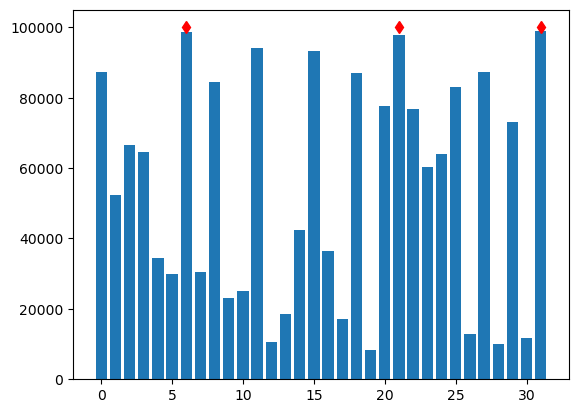

In [83]:
nx=2;syn=1;contrast_condi=1;freq=0;
plt.bar(range(32),nx3counter10[nx,syn,contrast_condi-1,freq,:])
sigroi = np.where(nx3counter10[nx,syn,contrast_condi-1,freq,:] > 95000)[0]
nsig = len(sigroi)
plt.plot(sigroi,100000*np.ones(nsig),'rd')

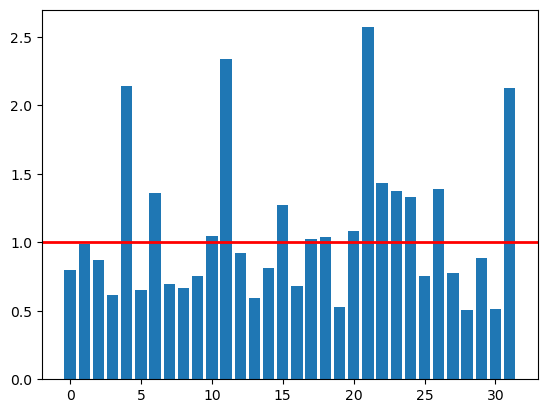

In [84]:
nx=2;syn=1;contrast_condi=2;freq=6;j=100000-1;
plt.bar(range(32),nx3gain10[nx,syn,contrast_condi-1,freq,:])
plt.axhline(y=1, color='r', linestyle='-', linewidth=2)

In [ ]:
# permutation test reference: /home/zhibinz2/Documents/GitHub/STROKE_P61/lesion_mask_on_L_p61_20240427/networkx/new_simu/permutation20241126.ipynb
nx3gain10   =np.zeros((3,2,3,7,32)) # 3nx x 2syn x 3contrast condi x7freq x32chan
nx3gain01   =np.zeros((3,2,3,7,32))
nx3counter10=np.zeros((3,2,3,7,32))
nx3counter01=np.zeros((3,2,3,7,32))

rng = np.random.default_rng(seed =300)
for nx in range(3):
    for syn in range(2):
        print(syn)
        for contrast_condi in range(1,4):
            for freq in range(7):
                nx3gain10[nx,syn,contrast_condi-1,freq,:]=\
                    np.mean(cc3_syn[nx,syn,contrast_condi,:,freq,:],axis=0)/np.mean(cc3_syn[nx,syn,0,:,freq,:],axis=0)
                nx3gain01[nx,syn,contrast_condi-1,freq,:]=\
                    np.mean(cc3_syn[nx,syn,0,:,freq,:],axis=0)/np.mean(cc3_syn[nx,syn,contrast_condi,:,freq,:],axis=0) # some trials get nan and inf
                sim10=np.zeros((100000,32))
                sim01=np.zeros((100000,32))
                combined_mat=np.concatenate((cc3_syn[nx,syn,0,:,freq,:], cc3_syn[nx,syn,contrast_condi,:,freq,:]),axis=0)
                for j in range(100000):
                    shuffled_combined = np.random.permutation(combined_mat)
                    sim10[j,:]=np.mean(shuffled_combined[36:72])/np.mean(shuffled_combined[0:36])
                    sim01[j,:]=np.mean(shuffled_combined[0:36])/np.mean(shuffled_combined[36:72])
                    nx3counter10[nx,syn,contrast_condi-1,freq,:]=nx3counter10[nx,syn,contrast_condi-1,freq,:]+\
                        (nx3gain10[nx,syn,contrast_condi-1,freq,:] > sim10[j,:])
                    nx3counter01[nx,syn,contrast_condi-1,freq,:]=nx3counter01[nx,syn,contrast_condi-1,freq,:]+\
                        (nx3gain01[nx,syn,contrast_condi-1,freq,:] > sim01[j,:])
# 9 minutes

In [115]:
combined_mat=np.concatenate((cc3_syn[nx,syn,0,:,freq,:], cc3_syn[nx,syn,contrast_condi,:,freq,:]),axis=0)
shuffled_combined = np.random.permutation(combined_mat)

In [21]:
sim10[50000,:]

array([1.02578996, 1.02578996, 1.02578996, 1.02578996, 1.02578996,
       1.02578996, 1.02578996, 1.02578996, 1.02578996, 1.02578996,
       1.02578996, 1.02578996, 1.02578996, 1.02578996, 1.02578996,
       1.02578996, 1.02578996, 1.02578996, 1.02578996, 1.02578996,
       1.02578996, 1.02578996, 1.02578996, 1.02578996, 1.02578996,
       1.02578996, 1.02578996, 1.02578996, 1.02578996, 1.02578996,
       1.02578996, 1.02578996])

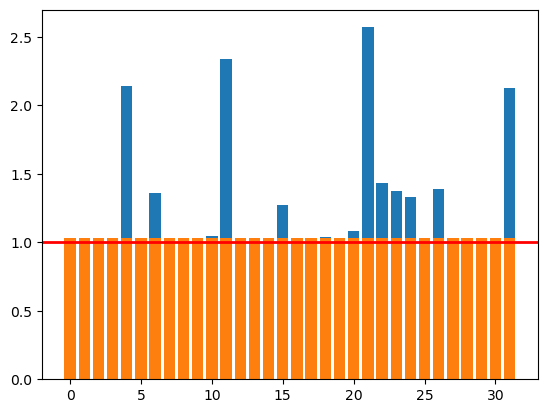

In [20]:
nx=2;syn=1;contrast_condi=2;freq=6; j=50
# j=100000-1;
plt.bar(range(32),nx3gain10[nx,syn,contrast_condi-1,freq,:])
plt.bar(range(32),sim10[j,:])
plt.axhline(y=1, color='r', linestyle='-', linewidth=2)

In [25]:
nx3permu2=dict()
nx3permu2['nx3gain10']  =nx3gain10
nx3permu2['nx3gain01']  =nx3gain01
nx3permu2['nx3counter10']=nx3counter10
nx3permu2['nx3counter01']=nx3counter01
savemat('nx3permu2.mat',nx3permu2)